# What can tweets about the H1N1 vaccine tell us about the evolution of vaccine acceptance?

# Data Exploration & Analysis

This file does the following exploration and analysis steps:

1. Removes Duplicates & Checks Random Samples of Tweets 
2. Cleans the Tweets (e.g., lowercase, removes links, remove non-alphabet characters, stop words & query words)
3. Compares Most Frequent Words Across Times
4. Extract Topics (TF-IDF, TruncatedSVD)
5. Calculates the Similarity Between the Topics 
6. Sentiment Anaylsis 
7. Comparison to Data on Number of Vaccine Doses Delivered & Number of Cases
8. Output DataFrame

### Step 1: Load Tweets, Remove Duplicates & Check Random Samples

In [1]:
import json

# read in tweets

with open('tweets_time1.json', 'r') as f:
    tweets_time1 = json.load(f)
    
with open('tweets_time2.json', 'r') as f:
    tweets_time2 = json.load(f)

with open('tweets_time3.json', 'r') as f:
    tweets_time3 = json.load(f)
    
with open('tweets_time4.json', 'r') as f:
    tweets_time4 = json.load(f)
    
with open('tweets_time5.json', 'r') as f:
    tweets_time5 = json.load(f)
    
with open('tweets_time6.json', 'r') as f:
    tweets_time6 = json.load(f)
    
with open('tweets_time7.json', 'r') as f:
    tweets_time7 = json.load(f)

with open('tweets_time8.json', 'r') as f:
    tweets_time8 = json.load(f)
    
tweets_list = [tweets_time1, tweets_time2, tweets_time3, tweets_time4, tweets_time5, tweets_time6, tweets_time7, tweets_time8]

#### Check for and remove any duplicate tweets

In [2]:
# source: https://www.w3schools.com/python/python_howto_remove_duplicates.asp

def remove_dups(x):
    return list(dict.fromkeys(x))

In [3]:
tweets_list_no_dups = []

for tweets in tweets_list:
    tweets_text = [tweets[tweet]["text"] for tweet in tweets]
    tweets_text_no_dups = remove_dups(tweets_text)
    tweets_list_no_dups.append(tweets_text_no_dups)
    print("Before:", len(tweets_text), "After:", len(tweets_text_no_dups))

Before: 541 After: 527
Before: 500 After: 454
Before: 500 After: 437
Before: 500 After: 456
Before: 500 After: 462
Before: 500 After: 476
Before: 500 After: 479
Before: 500 After: 471


Note: we still may see substantial overlap in the content of some tweets; for example, tweets may refer to the same article by its title.

#### Preview random sample of tweets from each: are they appropiate (i.e., are they all discussing the H1N1/swine flu vaccine?)

In [4]:
import random
count = 1
for tweets in tweets_list_no_dups:
    print("Random Sample of Tweets for Time {}".format(count))
    print(random.sample(tweets, 10))
    count += 1
    print("-------------------------------------------------------------------------------------------------------------")

Random Sample of Tweets for Time 1
['@andersoncooper Hi Anderson, at this stage for swine flu, how does it compare with SARS as to all stats, deaths, infected, odds of vaccine.', '@gizelle689 same symptoms but the swine flu mutates in humans. So as we continue to pass it on, it gets stronger unless we vaccinate.', 'key ingredient for swine flu vaccine to be ready by may but it may be a few months for a vaccine apparently! craaazy.', 'Swine flu WTF!?!? Jesus be a vaccine...', '#dnsales NP Auction: Swine Flu Vaccine package!!! http://tinyurl.com/cwv7ct', 'H1N1 Precautions:1) Buy 3M/Inovel 1500 Series N95 Respirator, 2) Get the pneumonia vaccine (23-valent polysaccharide).Our family did today.', 'FOX40 NEWS ALERT: CNN is reporting clinical trials for a Swine Flu vaccine may roll out soon.', 'Who are the swines?.vaccinate the victums of "B.S."(bird/swine flu).http://tinyurl.com/cncmly', 'Swine Flu Special Report, Vaccines, Treatments, Prevention, Cases, www.BallerinaDaily.com/wordpress', '

### Step 2: Clean Tweets

In [5]:
import re

# function to remove links
def strip_links(text):
    link_regex = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')
    return text

# define stop words and query words list to be removed
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
query_words = ["H1N1", "swineflu", "swine", "flu", "vaccine", "vaccines", "vaccination", "vaccinations", 
                                                       "vaccinate", "vaccinates", "vaccinated"]

In [6]:
cleaned_tweets_list = []
for tweets in tweets_list_no_dups:
    cleaned_tweets = []
    for tweet in tweets:
        tweet_no_link = strip_links(tweet) # strip off any links
        tweet_lower = tweet_no_link.lower() # lowercase all letters
        tweet_only_alpha = re.sub("[^a-zA-Z]", " ", tweet_lower) # remove all characters that are not alphabetical
        tweet_spaces_removed = re.sub(' +', ' ', tweet_only_alpha).strip() # remove extra spaces and strip any at beginning/end
        tweet_no_stop_words = [item for item in tweet_spaces_removed.split() if (item not in stop_words and item not in query_words)]
        cleaned_tweets.append(" ".join(tweet_no_stop_words))
    cleaned_tweets_list.append(cleaned_tweets)

### Step 3: Compare Most Frequent Words Across Times

In [7]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


# https://stackoverflow.com/questions/15586721/wordnet-lemmatization-and-pos-tagging-in-python
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN # default to noun


def extract_most_frequent_words(cleaned_tweets_list):
    lemmatizer = WordNetLemmatizer()
    lemmas = {}
    for tweet in cleaned_tweets_list:
        tokens = nltk.word_tokenize(tweet)
        tagged = nltk.pos_tag(tokens)

        for tag in tagged:
            if len(tag[0]) > 2: # only keep words with more than 2 characters
                lemma = lemmatizer.lemmatize(tag[0].lower(), pos=get_wordnet_pos(tag[1]))
                if lemma not in lemmas:
                    lemmas[lemma] = 1
                else:
                    lemmas[lemma] += 1
    return lemmas


lemmas1 = extract_most_frequent_words(cleaned_tweets_list[0])
lemmas2 = extract_most_frequent_words(cleaned_tweets_list[1])
lemmas3 = extract_most_frequent_words(cleaned_tweets_list[2])
lemmas4 = extract_most_frequent_words(cleaned_tweets_list[3])
lemmas5 = extract_most_frequent_words(cleaned_tweets_list[4])
lemmas6 = extract_most_frequent_words(cleaned_tweets_list[5])
lemmas7 = extract_most_frequent_words(cleaned_tweets_list[6])
lemmas8 = extract_most_frequent_words(cleaned_tweets_list[7])

In [8]:
sorted_lemmas1 = sorted(lemmas1.items(), key = lambda x:x[1], reverse=True)[:25] # only take top 25 terms 
sorted_lemmas2 = sorted(lemmas2.items(), key = lambda x:x[1], reverse=True)[:25] # only take top 25 terms 
sorted_lemmas3 = sorted(lemmas3.items(), key = lambda x:x[1], reverse=True)[:25] # only take top 25 terms 
sorted_lemmas4 = sorted(lemmas4.items(), key = lambda x:x[1], reverse=True)[:25] # only take top 25 terms 
sorted_lemmas5 = sorted(lemmas5.items(), key = lambda x:x[1], reverse=True)[:25] # only take top 25 terms 
sorted_lemmas6 = sorted(lemmas6.items(), key = lambda x:x[1], reverse=True)[:25] # only take top 25 terms 
sorted_lemmas7 = sorted(lemmas7.items(), key = lambda x:x[1], reverse=True)[:25] # only take top 25 terms 
sorted_lemmas8 = sorted(lemmas8.items(), key = lambda x:x[1], reverse=True)[:25] # only take top 25 terms 

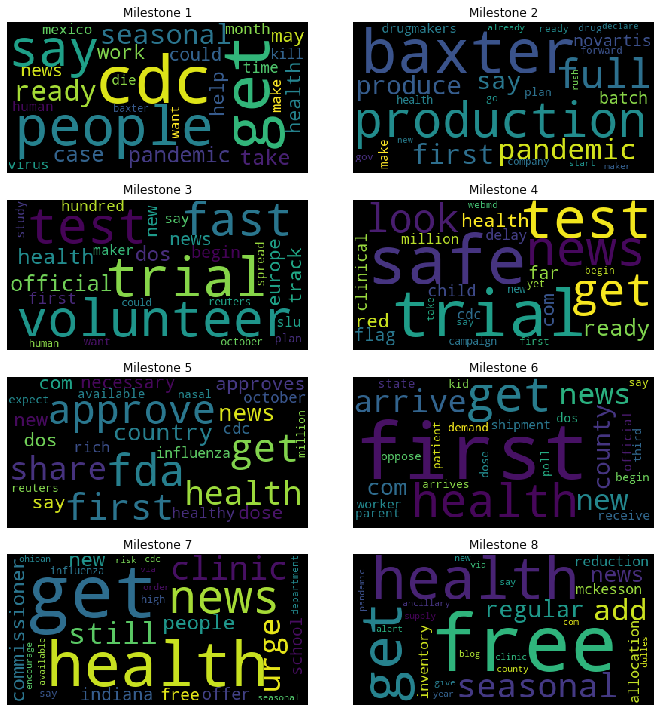

In [9]:
# Generate Word Clouds to Compare Most Frequent Words across milestones
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def Create_WordCloud(sorted_lemmas):
    lemmas = [t[0] for t in sorted_lemmas]
    counts = [t[1] for t in sorted_lemmas]
    word_cloud_dict = dict(zip(lemmas, counts))

    wordcloud = WordCloud().generate_from_frequencies(word_cloud_dict)
    return wordcloud

sorted_lemmas = [sorted_lemmas1, sorted_lemmas2, sorted_lemmas3, sorted_lemmas4, sorted_lemmas5, 
                                                            sorted_lemmas6, sorted_lemmas7, sorted_lemmas8]
fig = plt.figure(figsize=(10, 10), tight_layout=True)
for i in range(len(sorted_lemmas)):
    ax = fig.add_subplot(4,2,i+1)
    wordcloud = Create_WordCloud(sorted_lemmas[i])
    plt.gca().set_title('Milestone {}'.format(i+1))
    ax.imshow(wordcloud)
    ax.axis('off')

### Step 4: Extract Topics

In [10]:
# source: https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

vectorized_tweets = []
terms_list = []

for tweets in cleaned_tweets_list:
    vectorizer = TfidfVectorizer(stop_words='english', max_df = 0.5)  # ignore terms that have a document frequency higher than 0.5
    X = vectorizer.fit_transform(tweets)
    vectorized_tweets.append(X)
    print(X.shape) # check shape of the document-term matrix
    terms = vectorizer.get_feature_names()
    
    svd_model = TruncatedSVD(n_components=5, random_state=671) # n_components = # of topics
    svd_model.fit(X)
    
    time_terms = []
    for i, comp in enumerate(svd_model.components_):
        terms_comp = zip(terms, comp)
        sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:20] # only take top 20 terms for each topic for simplicity
        time_terms.append(sorted_terms)
    terms_list.append(time_terms)

# checks
print(len(terms_list))
print(len(terms_list[0]))

(527, 1501)
(454, 781)
(437, 797)
(456, 987)
(462, 1086)
(476, 1239)
(479, 1184)
(471, 991)
8
5


#### Preview Topics for Each Time

In [11]:
count = 1
for terms in terms_list:
    print("Time {}".format(count))
    sub_count = 1
    for topic in terms:
        print("Topic "+str(sub_count)+": ")
        print([t[0] for t in topic])
        sub_count += 1
    count += 1
    print("-------------------------------------------------------------------------------------------------")

Time 1
Topic 1: 
['cdc', 'readies', 'case', 'pandemic', 'time', 'closely', 'novel', 'watching', 'seasonal', 'prepares', 'pat', 'sickening', 'source', 'feedzilla', 'new', 'help', 'prevents', 'memory', 'post', 'blog']
Topic 2: 
['seasonal', 'help', 'health', 'officials', 'ap', 'say', 'news', 'pessimistic', 'protection', 'post', 'ingredient', 'national', 'protect', 'wants', 'pessimisti', 'seaso', 'aga', 'offer', 'protects', 'months']
Topic 3: 
['months', 'ingredient', 'wants', 'news', 'mexico', 'ready', 'city', 'key', 'scientists', 'away', 'hope', 'health', 'launches', 'campaign', 'stop', 'com', 'livescience', 'roche', 'massive', 'gilead']
Topic 4: 
['months', 'away', 'help', 'livescience', 'ryall', 'com', 'seasonal', 'develop', 'digitaljournal', 'distribute', 'possible', 'best', 'cnn', 'ready', 'major', 'obstacle', 'relian', 'states', 'united', 'production']
Topic 5: 
['mexico', 'city', 'launches', 'campaign', 'massive', 'people', 'months', 'died', 'stop', 'current', 'protect', 'says', '

### Step 5: Calculate Similarity Between Topics

In [12]:
import numpy as np
import itertools

# extract words for each topic

time1 = {}

def create_terms_dict(terms_list):
    count = 1
    d = {}
    for topic in terms_list:
        d["Topic {}".format(count)] = [t[0] for t in topic]
        count += 1
    return d

time1 = create_terms_dict(terms_list[0])
time2 = create_terms_dict(terms_list[1])
time3 = create_terms_dict(terms_list[2])
time4 = create_terms_dict(terms_list[3])
time5 = create_terms_dict(terms_list[4])
time6 = create_terms_dict(terms_list[5])
time7 = create_terms_dict(terms_list[6])
time8 = create_terms_dict(terms_list[7])

times = [time1, time2, time3, time4, time5, time6, time7, time8]

In [13]:
# calculate the similarity of each topic to the other topics at the same time point

def calculate_intra_similarities(terms):
    intra_sims = []
    for topic1, topic2 in itertools.combinations(terms.values(), 2): # compare every pair of topics
        topic1 = set(topic1)
        topic2 = set(topic2)
        intersection = len(topic1.intersection(topic2))
        union = len(topic1.union(topic2))
        similarity = intersection/union
        intra_sims.append(similarity)
    return (np.mean(intra_sims), intra_sims) # return the mean as well as each value

intra_similarities = []
for time in times:
    intra_similarities.append(calculate_intra_similarities(time))
print([sim[0] for sim in intra_similarities]) # check

[0.07909018435334225, 0.10938403701561597, 0.11465440561365858, 0.1652808340888836, 0.13390698835344933, 0.0966182668269955, 0.05905674667284575, 0.06027056553372343]


In [15]:
# calculate the similarity of each topic to topics from other time points

def calculate_inter_similarities(terms, index):
    
    all_topic_similarities = []
    times = [time1, time2, time3, time4, time5, time6, time7, time8]
    del times[index]
    other_times = [t.values() for t in times]

    for topic in terms.values():
        topic1 = set(topic)
        topic_similarities = []
        for time in other_times:
            similarities = []
            for topic in time:
                topic2 = set(topic)
                intersection = len(topic1.intersection(topic2))
                union = len(topic1.union(topic2))
                similarity = intersection/union
                similarities.append(similarity)
            
            topic_similarities.append(np.mean(similarities))
        all_topic_similarities.append(topic_similarities)
    return np.mean(all_topic_similarities, axis=0)

inter_sims_time1 = calculate_inter_similarities(time1,0) # list,index
inter_sims_time2 = calculate_inter_similarities(time2,1) 
inter_sims_time3 = calculate_inter_similarities(time3,2) 
inter_sims_time4 = calculate_inter_similarities(time4,3) 
inter_sims_time5 = calculate_inter_similarities(time5,4) 
inter_sims_time6 = calculate_inter_similarities(time6,5) 
inter_sims_time7 = calculate_inter_similarities(time7,6) 
inter_sims_time8 = calculate_inter_similarities(time8,7) 

In [30]:
# combine intra- and inter-similarities for each milestone
time1_sims = np.insert(inter_sims_time1, 0, intra_similarities[0][0])
time2_sims = np.insert(inter_sims_time2, 1, intra_similarities[1][0])
time3_sims = np.insert(inter_sims_time3, 2, intra_similarities[2][0])
time4_sims = np.insert(inter_sims_time4, 3, intra_similarities[3][0])
time5_sims = np.insert(inter_sims_time5, 4, intra_similarities[4][0])
time6_sims = np.insert(inter_sims_time6, 5, intra_similarities[5][0])
time7_sims = np.insert(inter_sims_time7, 6, intra_similarities[6][0])
time8_sims = np.insert(inter_sims_time8, 7, intra_similarities[7][0])

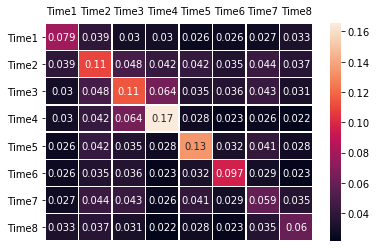

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# combining intra- and inter-similarities into matrix
dat = np.array([time1_sims,time2_sims,time3_sims,time4_sims,time5_sims,time6_sims,time7_sims,time8_sims])

ax = sns.heatmap(dat, linewidth=0.5, annot=True, xticklabels=['Time1', 'Time2', 'Time3', 'Time4', 'Time5', 'Time6', 'Time7', 'Time8'],
                yticklabels=['Time1', 'Time2', 'Time3', 'Time4', 'Time5', 'Time6', 'Time7', 'Time8'])
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

plt.show()

### Step 6: Sentiment Analysis

In [32]:
#sentiment analysis

from textblob import *

def calculate_polarity(cleaned_tweets):
    sentiment_scores = []
    for tweet in cleaned_tweets:
        blob = TextBlob(tweet)
        sentiment_scores.append(blob.sentiment)
    polarities = [sent.polarity for sent in sentiment_scores]
    # remove tweets with polarity near 0 - are there more positive or negative extremes?
    polarities_subset = [pol for pol in polarities if pol >= 0.10 or pol <= -0.10]
    return polarities_subset

polarities_by_time = []
for time in cleaned_tweets_list:
    polarities_by_time.append(calculate_polarity(time))

In [33]:
from scipy.stats import f_oneway

F, p = f_oneway(polarities_by_time[0], polarities_by_time[1], polarities_by_time[2], polarities_by_time[3],
               polarities_by_time[4], polarities_by_time[5], polarities_by_time[6], polarities_by_time[7])
print(F,p)

7.526012010075075 6.100925390122023e-09


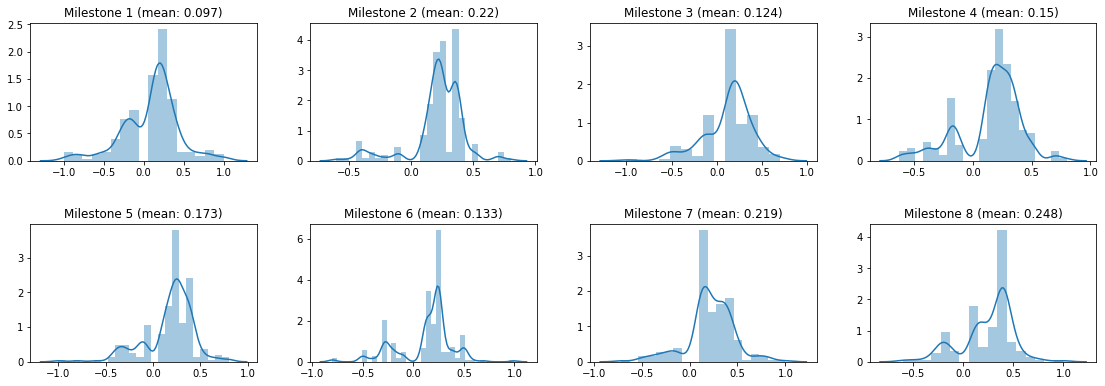

In [34]:
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(figsize=(16,6),  ncols=4, nrows=2)
sns.distplot(polarities_by_time[0], ax=ax[0][0]).set_title('Milestone 1 (mean: {})'.format(round(np.mean(polarities_by_time[0]),3)))
sns.distplot(polarities_by_time[1], ax=ax[0][1]).set_title('Milestone 2 (mean: {})'.format(round(np.mean(polarities_by_time[1]),3)))
sns.distplot(polarities_by_time[2], ax=ax[0][2]).set_title('Milestone 3 (mean: {})'.format(round(np.mean(polarities_by_time[2]),3)))
sns.distplot(polarities_by_time[3], ax=ax[0][3]).set_title('Milestone 4 (mean: {})'.format(round(np.mean(polarities_by_time[3]),3)))
sns.distplot(polarities_by_time[4], ax=ax[1][0]).set_title('Milestone 5 (mean: {})'.format(round(np.mean(polarities_by_time[4]),3)))
sns.distplot(polarities_by_time[5], ax=ax[1][1]).set_title('Milestone 6 (mean: {})'.format(round(np.mean(polarities_by_time[5]),3)))
sns.distplot(polarities_by_time[6], ax=ax[1][2]).set_title('Milestone 7 (mean: {})'.format(round(np.mean(polarities_by_time[6]),3)))
sns.distplot(polarities_by_time[7], ax=ax[1][3]).set_title('Milestone 8 (mean: {})'.format(round(np.mean(polarities_by_time[7]),3)))

fig.tight_layout(pad=3.0)

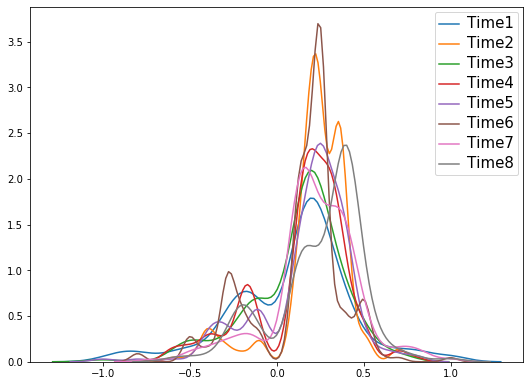

In [35]:
fig, ax = plt.subplots(figsize=(8,6))
sns.kdeplot(polarities_by_time[0], ax=ax, label='Time1')
sns.kdeplot(polarities_by_time[1], ax=ax, label='Time2')
sns.kdeplot(polarities_by_time[2], ax=ax, label='Time3')
sns.kdeplot(polarities_by_time[3], ax=ax, label='Time4')
sns.kdeplot(polarities_by_time[4], ax=ax, label='Time5')
sns.kdeplot(polarities_by_time[5], ax=ax, label='Time6')
sns.kdeplot(polarities_by_time[6], ax=ax, label='Time7')
sns.kdeplot(polarities_by_time[7], ax=ax, label='Time8')
ax.legend()

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text

fig.tight_layout(pad=3.0)

### Step 7: Comparison to Data on Number of Vaccine Doses Delivered & Number of Cases

In [36]:
# source: https://www.ncbi.nlsm.nih.gov/pmc/articles/PMC3647645/ 

import pandas as pd

h1n1_data = pd.read_csv('H1N1_Data.csv', usecols=[0,1,2,3])
h1n1_data.dropna(inplace=True)
h1n1_data = h1n1_data[h1n1_data['cumulative number of persons vaccinated'] > 0]
h1n1_data.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,cumulative number of persons vaccinated,number of cases,cumulative number of pregnant women vaccinated
26,"October 10, 2009",2971000.0,4461542.0,171000.0
27,"October 17, 2009",6536000.0,6549205.0,376000.0
28,"October 24, 2009",10993000.0,7120298.0,633000.0
29,"October 31, 2009",17826000.0,6297210.0,1026000.0
30,"November 7, 2009",23755000.0,5899647.0,1230000.0


In [37]:
h1n1_data.columns = ['Date', 'Number of Persons Vaccinated', 'Number of Cases',
       'Number of Pregnant Women Vaccinated']
h1n1_data.head()

,Date,Number of Persons Vaccinated,Number of Cases,Number of Pregnant Women Vaccinated
26,"October 10, 2009",2971000.0,4461542.0,171000.0
27,"October 17, 2009",6536000.0,6549205.0,376000.0
28,"October 24, 2009",10993000.0,7120298.0,633000.0
29,"October 31, 2009",17826000.0,6297210.0,1026000.0
30,"November 7, 2009",23755000.0,5899647.0,1230000.0


In [38]:
import altair as alt


alt.Chart(h1n1_data, title='Cumulative Number of Persons Vaccinated & Case Count').mark_point(filled=True, size=50
).transform_fold(
    fold=['Number of Persons Vaccinated', 'Number of Cases'], 
    as_=['variable', 'value']
).encode(
    x=alt.X('Date:N', sort=None),
    y=alt.Y('value:Q', axis=alt.Axis(title='Count')),
    color='variable:N'
)

alt.Chart(...)

In [39]:
alt.Chart(h1n1_data, title='Cumulative Number of Pregnant Women Vaccinated').mark_point(filled=True, size=50).encode(
    x=alt.X('Date:N', sort=None),
    y='Number of Pregnant Women Vaccinated:Q',
)

alt.Chart(...)

### Step 8. Output DataFrame

In [83]:
# for each milestone, columns:
# (1) milestone description
# (2) milestone date
# (3) number of tweets-before removing dups 
# (4) number of tweets-after removing dupls
# (5) top 25 most frequent words (lemmas)
# (6) topic 1 words 
# (7) topic 2 words
# (8) topic 3 words
# (9) topic 4 words
# (10) topic 5 words
# (11) mean polarity score

row_names = ['Milestone 1', 'Milestone 2', 'Milestone 3', 'Milestone 4', 'Milestone 5', 'Milestone 6',
                                                            'Milestone 7', 'Milestone 8']
column_names = ['Description', 'Date', 'Number of Tweets (all)', 'Number of Tweets (no dups)', 'Top 25 Most Frequent Words (Lemmas)',
               'Topic 1 Words', 'Topic 2 Words', 'Topic 3 Words', 'Topic 4 Words', 'Topic 5 Words',
               'Mean Polarity Score']

milestone_descs = ['First Human Infection in California', 'WHO Declared a Pandemic', 'Clinical Trial Testing Began',
                  'Second Wave of Influenza Activity Began', 'FDA Announced Approval of 4 H1N1 Vaccines',
                   '1st Doses of H1N1 Vaccine Given in the U.S.','National Influenza Vaccination Week', 
                   'WHO Recommends H1N1 Component for Influenza Vaccine']
milestone_dates = ['2009-04-15', '2009-06-11', '2009-07-22', '2009-08-20', '2009-09-15', '2009-10-05', 
                   '2010-01-10', '2010-02-18']


number_tweets_uncleaned = [len(tweets) for tweets in tweets_list]

number_tweets_cleaned = [len(tweets) for tweets in tweets_list_no_dups]

sorted_lemmas_words = []
for lemmas in sorted_lemmas:
    lemmas = [lems[0] for lems in lemmas]
    sorted_lemmas_words.append(lemmas)
    
topic_words_all = []
for terms in terms_list:
    for t in terms:
        words = [w[0] for w in t]
        topic_words_all.append(words)
        
import operator
index1 = [0,5,10,15,20,25,30,35]
topic1_words = operator.itemgetter(*index1)(topic_words_all)
index2 = [1,6,11,16,21,26,31,36]
topic2_words = operator.itemgetter(*index2)(topic_words_all)
index3 = [2,7,12,17,22,27,32,37]
topic3_words = operator.itemgetter(*index3)(topic_words_all)
index4 = [3,8,13,18,23,28,33,38]
topic4_words = operator.itemgetter(*index4)(topic_words_all)
index5 = [4,9,14,19,24,29,34,39]
topic5_words = operator.itemgetter(*index5)(topic_words_all)

mean_polarities = [np.round(np.mean(pol),3) for pol in polarities_by_time]

In [84]:
# combine into dataframe
data = pd.DataFrame(data=[milestone_descs, milestone_dates, number_tweets_uncleaned, number_tweets_cleaned, 
    sorted_lemmas_words, topic1_words, topic2_words, topic3_words, topic4_words, topic5_words, mean_polarities],
            ).transpose()
data.index = row_names
data.columns = column_names
data

,Description,Date,Number of Tweets (all),Number of Tweets (no dups),Top 25 Most Frequent Words (Lemmas),Topic 1 Words,Topic 2 Words,Topic 3 Words,Topic 4 Words,Topic 5 Words,Mean Polarity Score
Milestone 1,First Human Infection in California,2009-04-15,541,527,"[cdc, get, people, say, seasonal, ready, pande...","[cdc, readies, case, pandemic, time, closely, ...","[seasonal, help, health, officials, ap, say, n...","[months, ingredient, wants, news, mexico, read...","[months, away, help, livescience, ryall, com, ...","[mexico, city, launches, campaign, massive, pe...",0.097
Milestone 2,WHO Declared a Pandemic,2009-06-11,500,454,"[baxter, production, full, pandemic, first, pr...","[baxter, production, making, starts, ap, drug,...","[plans, forward, going, gov, ap, health, secre...","[drugmakers, rush, produce, pour, furnish, com...","[batch, company, novartis, produces, ag, title...","[making, starts, journal, street, wall, declar...",0.22
Milestone 3,Clinical Trial Testing Began,2009-07-22,500,437,"[trial, volunteer, test, fast, official, healt...","[fast, tracking, europe, officials, safe, insi...","[doses, germany, mln, orders, oct, million, of...","[slu, study, volunteer, hundreds, center, deve...","[officials, health, spreads, plan, reuters, sa...","[test, volunteers, wanted, trials, begin, aust...",0.124
Milestone 4,Second Wave of Influenza Activity Began,2009-08-20,500,456,"[safe, trial, test, news, get, look, ready, he...","[red, flags, tests, com, news, msnbc, wsb, wsb...","[safe, delayed, looks, ready, far, trials, ear...","[delayed, ready, million, doses, advisers, oct...","[children, begin, trial, clinical, brother, na...","[advisers, ready, officials, expect, ca, canad...",0.15
Milestone 5,FDA Announced Approval of 4 H1N1 Vaccines,2009-09-15,500,462,"[fda, approve, get, first, health, share, coun...","[share, countries, rich, fda, reuters, healthy...","[healthy, necessary, fda, approves, new, exami...","[fda, approves, influenza, approved, new, stre...","[doses, soon, million, coming, cdc, available,...","[women, pregnant, recommended, questioned, ang...",0.173
Milestone 6,1st Doses of H1N1 Vaccine Given in the U.S.,2009-10-05,500,476,"[first, get, health, arrive, news, new, county...","[health, workers, new, doses, news, arrive, de...","[demand, anxious, frustrated, patients, new, j...","[parents, oppose, poll, ap, yotwits, hourz, cu...","[arrive, shipments, doses, abc, news, campaign...","[angeles, los, spray, nasal, arrived, county, ...",0.133
Milestone 7,National Influenza Vaccination Week,2010-01-10,500,479,"[get, health, news, clinic, urge, still, peopl...","[indiana, commissioner, health, urging, people...","[offered, bernards, new, news, brunswick, home...","[ohioans, high, risk, news, considered, says, ...","[influenza, fraud, abuse, related, cdc, new, r...","[companies, european, face, inquiry, drug, cou...",0.219
Milestone 8,WHO Recommends H1N1 Component for Influenza Va...,2010-02-18,500,471,"[free, health, get, seasonal, add, regular, ne...","[allocations, inventory, mckesson, reduction, ...","[given, free, dulles, wtop, health, county, lo...","[add, regular, evidence, web, seasonal, health...","[seasonal, new, strain, blog, added, year, jel...","[blog, jellofart, buttar, dr, exclusive, july,...",0.248


In [85]:
data.to_csv('Final_Data.csv')